In [1]:
import neuron
from neuron import h,rxd,gui2
print(neuron.__version__)


from neuron import h,rxd, gui
from neuron.units import ms, mV
import textwrap

7.7.2


#Step 2: Create a cell 

##Aside 1: NEURON's h.topology function
NEURON's h.topology() function displays the topological structure of the entire model, indicating which sections are connected to which sections, where they are connected, and how many segments each section is divided into.


load library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
image = np.load('data_downsampled_from_19513019.npy')

(20001, 2)


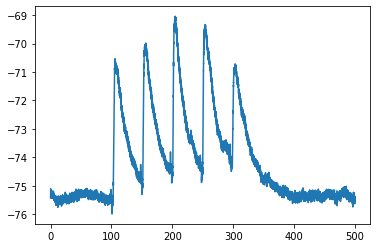

In [21]:
print(image.shape)
x = image[:,0]*1000
y = image[:,1]
y = y-10
plt.plot(x,y)
plt.show()

# Our model

In [22]:
h.load_file('stdrun.hoc')


1.0

In [5]:
soma = h.Section(name='soma')
soma.L = 100
soma.diam = 100
soma.insert('hh')
dendrite = h.Section(name='dendrite')
dendrite.L = 500
dendrite.diam = 0.5
dendrite.nseg = 10
dendrite.insert('pas') #hh
dendrite_1 = h.Section(name='dendrite_1')
dendrite_1.L = 100
dendrite_1.diam = 0.5
dendrite_1.nseg = 10
dendrite_1.insert('pas')
dendrite_2 = h.Section(name='dendrite_2')
dendrite_2.L = 100
dendrite_2.diam = 0.5
dendrite_2.nseg = 10
dendrite_2.insert('pas');

Connection

In [6]:
dendrite.connect(soma,1,0)
dendrite_1.connect(dendrite,1,1)
dendrite_2.connect(dendrite,1,1);

In [7]:
h.topology()


|-|       soma(0-1)
   `---------|       dendrite(0-1)
              `---------|       dendrite_1(1-0)
              `---------|       dendrite_2(1-0)



1.0

## Insert an alpha synaspe

Alpha synaspe 

In [12]:
h.load_file('stdrun.hoc')
print(dir(soma(0.5).hh))
s = h.NetStim()
soma(0.5).hh.el=-80 #pour la dendrite = voir en divisant par 10



['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'el', 'gk', 'gkbar', 'gl', 'gna', 'gnabar', 'h', 'il', 'is_ion', 'm', 'n', 'name', 'segment']


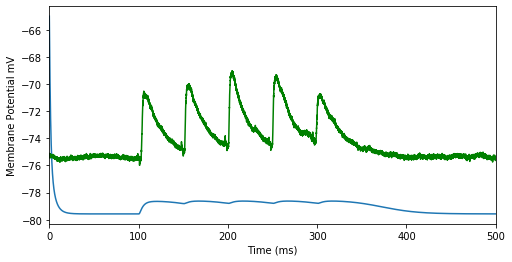

[-75.4296875  -75.35339355 -75.36865234 ... -75.50598145 -75.54412842
 -75.62805176]
[0.00000e+00 2.50000e-02 5.00000e-02 ... 4.99950e+02 4.99975e+02
 5.00000e+02]


In [28]:
asyn = h.Exp2Syn(dendrite(0.5))

asyn.tau1 = 10
asyn.tau2 = 20
asyn.e = 0
asyn.i = 0
s.interval =50
s.number= 5
s.noise=0
s.start=0


stim = h.NetCon(s,asyn)
stim.delay=100

stim.weight[0] = 0.0434124  # 0.0035

#x = x*1000

h.finitialize(-70 * mV)

v_vec = h.Vector()             # Membrane potential vector
t_vec = h.Vector()        
k_vec = h.Vector() 
na_vec = h.Vector()
v_vec.record(soma(0.5)._ref_v)
#k_vec.record(soma(0.5)._ref_h_hh)
#na_vec.record(soma(0.5._ref_n_hh))

t_vec.record(h._ref_t)

h.tstop = 500
h.run()
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec, v_vec)

plt.xlabel('Time (ms)')
plt.xlim(0,500)
plt.ylabel('Membrane Potential mV')
plt.plot(x,y,color='g')
plt.savefig('fit_praxis')
plt.show()
print(y)
print(x)

In [10]:
x1 = image[1000:,0]
y1 = image[1000:,1]
print(x1)
print(y1)

[0.025    0.025025 0.02505  ... 0.49995  0.499975 0.5     ]
[-65.4296875  -65.35339355 -65.44494629 ... -65.50598145 -65.54412842
 -65.62805176]


In [11]:
1/0.00001

99999.99999999999

In [12]:
print(t_vec[1])

0.025


In [13]:
x1 = h.Vector(image[:,1])
print(x1)


Vector[7]


In [14]:
tau1 = range(1,20)
tau2 = range(1,20)
x0 = (image[:,0])
x1 = (image[:,1])
#for x in x1: print(x)

print((x1[100]))
#for y in v_vec : print(y)
print((v_vec[100]))


-65.3381347656238
-74.06664557771019


In [30]:
vaa=h.Vector([1,10,0.001])


# Fit praxis

In [ ]:
def efun(vaa):
    asyn.tau1 = vaa[0]
    asyn.tau2 = vaa[1]
    stim.weight[0] = vaa[2]
    v_vec = h.Vector()             
    t_vec = h.Vector()             
    v_vec.record(soma(0.5)._ref_v)
    t_vec.record(h._ref_t)
    #vaa=h.Vector([asyn.tau1,asyn.tau2,stim.weight[0]])
    h.tstop = 500
    h.run()
    eps = np.sum((v_vec-y)**2)
    return eps #vaa[0]+vaa[1]+vaa[2]-5 ) ** 2 +5*( vaa[0]-vaa[1]-vaa[2]-15) ** 2 
h.attr_praxis(1e-5, 0.5, 0)
print('done')
e = h.fit_praxis(efun, vaa)
print("e=%g x=%g y=%g z=%g \n"%(e,vaa[0],vaa[1],vaa[2]))
    


done


# We take the optimal parameter and then we change the synaptic weight of Exp2 synapse

In [93]:
weight = np.linspace(0,1,1000)


In [94]:
vector = []

for w in weight :
    asyn = h.Exp2Syn(dendrite(0.5))
    asyn.tau1 = 1.68799
    asyn.tau2 = 20.8413
    asyn.e = 0
    asyn.i = 0
    s.interval =50
    s.number= 5
    s.noise=0
    s.start=0
    stim = h.NetCon(s,asyn)
    stim.delay=100
    h.finitialize(-60 * mV)
    stim.weight[0] = w
    v_vec = h.Vector()             # Membrane potential vector
    t_vec = h.Vector()             # Time stamp vector
    vector1 = v_vec.record(soma(0.5)._ref_v)
    t_vec.record(h._ref_t)
    h.tstop = 500
    h.run()
    vector.append(vector1[8198])
    

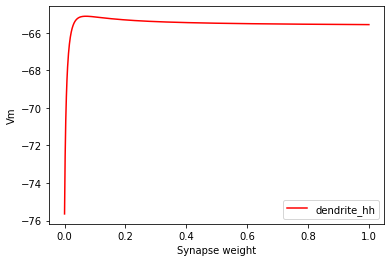

In [95]:
plt.ylabel('Vm')
plt.xlabel('Synapse weight')
plt.plot(weight,vector,'r',label='max Vm (dendrite_hh)')
plt.savefig('weight2')
plt.legend()
plt.show()

In [86]:
vector = []
weight = np.linspace(0,1,100)

for w in weight :
    asyn = h.Exp2Syn(dendrite(0.5))
    asyn.tau1 = 1.68799
    asyn.tau2 = 20.8413
    asyn.e = 0
    asyn.i = 0
    s.interval =50
    s.number= 5
    s.noise=0
    s.start=0
    stim = h.NetCon(s,asyn)
    stim.delay=100
    h.finitialize(-60 * mV)
    stim.weight[0] = w
    v_vec = h.Vector()             # Membrane potential vector
    t_vec = h.Vector()             # Time stamp vector
    vector1 = v_vec.record(soma(0.5)._ref_v)
    t_vec.record(h._ref_t)
    h.tstop = 500
    h.run()
    vector.append((max(vector1-min(vector1))))


10.744774276968442
10.744774276968442
11.06815577231282
12.59745128848207
13.898122755704094
15.52989228012531
114.89285858550284
116.10557132692958
116.60286228253148
116.88433534138092
117.08692249679801
117.21179062810164
117.33654054147422
117.42127980706775
117.48556814044215
117.54531010925061
117.58797625278478
117.6253835357189
117.66113967650594
117.69795378892826
117.74133088095357
117.75215306096976
117.7737320805366
117.80540854436299
117.82657310897683
117.84271553048698
117.85350721228235
117.85420047103165
117.87305783306127
117.89897229148792
117.90363414056526
117.90519201407966
117.9309538153959
117.91147275739574
117.94833928711499
117.92913470604415
117.96398064776082
117.95009568048002
117.97499507068865
117.97728409357006
117.97224073188087
117.99550181929644
117.98978526319297
117.99050253504444
118.01066498023931
118.00847451820549
117.99300575182716
118.01982014574367
118.02753918410656
118.02070033477419
118.01200951121304
118.03428767634642
118.04269731634747

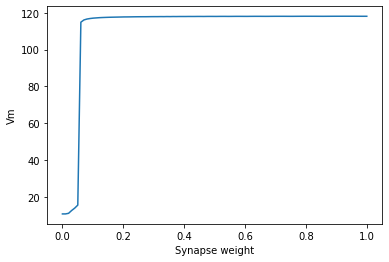

In [87]:
plt.ylabel('max Amplitude of Vm')
plt.xlabel('Synapse weight')
plt.plot(weight,vector)
plt.savefig('amplitudeweight')
plt.show()

# Need to have two parallele models : 
## = dendrite.insert('pas') 
## = dendrite.insert('hh') 



In [22]:
soma1 = h.Section(name='soma1')
soma1.L = 20
soma1.diam = 20
soma1.insert('hh')
dendrite1 = h.Section(name='dendrite1')
dendrite1.L = 500
dendrite1.diam = 0.5
dendrite1.nseg = 10
dendrite1.insert('hh') 
dendrite1_1 = h.Section(name='dendrite1_1')
dendrite1_1.L = 100
dendrite1_1.diam = 0.5
dendrite1_1.nseg = 10
dendrite1_1.insert('pas')
dendrite1_2 = h.Section(name='dendrite1_2')
dendrite1_2.L = 100
dendrite1_2.diam = 0.5
dendrite1_2.nseg = 10
dendrite1_2.insert('pas');

In [23]:
dendrite1.connect(soma1,1,0)
dendrite1_1.connect(dendrite1,1,1)
dendrite1_2.connect(dendrite1,1,1);

In [24]:
h.topology()


|-|       soma(0-1)
   `---------|       dendrite(0-1)
              `---------|       dendrite_1(1-0)
              `---------|       dendrite_2(1-0)
|-|       soma1(0-1)
   `---------|       dendrite1(0-1)
              `---------|       dendrite1_1(1-0)
              `---------|       dendrite1_2(1-0)



1.0

In [25]:
x0 = (image[:,0])*1000
x1 = (image[:,1])-10

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'el', 'gk', 'gkbar', 'gl', 'gna', 'gnabar', 'h', 'il', 'is_ion', 'm', 'n', 'name', 'segment']


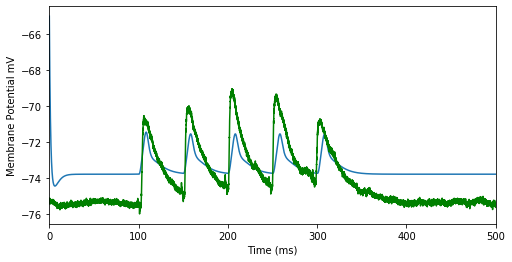

[-75.4296875  -75.35339355 -75.36865234 ... -75.50598145 -75.54412842
 -75.62805176]
118.09925761859512


In [26]:
h.load_file('stdrun.hoc')
print(dir(soma1(0.5).hh))
s1 = h.NetStim()
soma1(0.5).hh.el=-80 #pour la dendrite = voir en divisant par 10
dendrite1(0.5).hh.el=-8
asyn1 = h.Exp2Syn(dendrite1(0.5))

asyn1.tau1 = 6
asyn1.tau2 = 10
asyn1.e = 0
asyn1.i = 0
s1.interval =50
s1.number= 5
s1.noise=0
s1.start=0


stim1 = h.NetCon(s1,asyn1)
stim1.delay=100

stim1.weight[0] = 0.0007 # 0.0035

#x = x*1000

h.finitialize(-75 * mV)

v_vec1 = h.Vector()             # Membrane potential vector
t_vec1 = h.Vector()        
k_vec1 = h.Vector() 
na_vec1 = h.Vector()
v_vec1.record(soma1(0.5)._ref_v)
#k_vec.record(soma(0.5)._ref_h_hh)
#na_vec.record(soma(0.5._ref_n_hh))

t_vec1.record(h._ref_t)

h.tstop = 500
h.run()
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec1, v_vec1)

plt.xlabel('Time (ms)')
plt.xlim(0,500)
plt.ylabel('Membrane Potential mV')
plt.plot(x0,x1,color='g')
plt.savefig('fit_praxis')
plt.show()
print(y)
print(x)


In [27]:
h.topology()



|-|       soma(0-1)
   `---------|       dendrite(0-1)
              `---------|       dendrite_1(1-0)
              `---------|       dendrite_2(1-0)
|-|       soma1(0-1)
   `---------|       dendrite1(0-1)
              `---------|       dendrite1_1(1-0)
              `---------|       dendrite1_2(1-0)



1.0

In [28]:
vaa1=h.Vector([5,10,0.0007])

def efun1(vaa1):
    asyn1.tau1 = vaa1[0]
    asyn1.tau2 = vaa1[1]
    stim1.weight[0] = vaa1[2]
    v_vec1 = h.Vector()             
    t_vec1 = h.Vector()             
    v_vec1.record(soma1(0.5)._ref_v)
    t_vec1.record(h._ref_t)
    #vaa=h.Vector([asyn.tau1,asyn.tau2,stim.weight[0]])
    h.tstop = 500
    h.run()
    eps = np.sum((v_vec1-y)**2)
    return eps #vaa[0]+vaa[1]+vaa[2]-5 ) ** 2 +5*( vaa[0]-vaa[1]-vaa[2]-15) ** 2 
h.attr_praxis(1e-5, 0.5, 0)
print('done')
e = h.fit_praxis(efun1, vaa1)
print("e=%g x=%g y=%g z=%g \n"%(e,vaa1[0],vaa1[1],vaa1[2]))
    


done


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  


e=37402.2 x=4.06394 y=11 z=0.0007 



['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'el', 'gk', 'gkbar', 'gl', 'gna', 'gnabar', 'h', 'il', 'is_ion', 'm', 'n', 'name', 'segment']


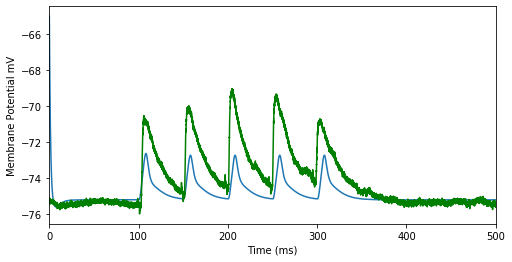

[-75.4296875  -75.35339355 -75.36865234 ... -75.50598145 -75.54412842
 -75.62805176]
123.4382650418654


In [70]:
h.load_file('stdrun.hoc')
print(dir(soma1(0.5).hh))
s1 = h.NetStim()
soma1(0.5).hh.el=-82.5 #pour la dendrite = voir en divisant par 10
asyn1 = h.Exp2Syn(dendrite1(0.5))

asyn1.tau1 = 4.06394
asyn1.tau2 = 11
asyn1.e = 0
asyn1.i = 0
s1.interval =50
s1.number= 5
s1.noise=0
s1.start=0


stim1 = h.NetCon(s1,asyn1)
stim1.delay=100

stim1.weight[0] = 0.0007

#x = x*1000

h.finitialize(-70 * mV)

v_vec1 = h.Vector()             # Membrane potential vector
t_vec1 = h.Vector()        
k_vec1 = h.Vector() 
na_vec1 = h.Vector()
v_vec1.record(soma1(0.5)._ref_v)
#k_vec.record(soma(0.5)._ref_h_hh)
#na_vec.record(soma(0.5._ref_n_hh))

t_vec1.record(h._ref_t)

h.tstop = 500
h.run()
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec1, v_vec1)

plt.xlabel('Time (ms)')
plt.xlim(0,500)
plt.ylabel('Membrane Potential mV')
plt.plot(x0,x1,color='g')
plt.savefig('fit_praxis')
plt.show()
print(y)
print(x)


In [105]:
print(x1.argmax(axis=0))
weight = np.linspace(0,1,1000)


8198


In [97]:
vector2= []

for w in weight :
    asyn1 = h.Exp2Syn(dendrite1(0.5))
    asyn1.tau1 = 4.06394
    asyn1.tau2 = 11
    asyn1.e = 0
    asyn1.i = 0
    s1.interval =50
    s1.number= 5
    s1.noise=0
    s1.start=0
    stim1 = h.NetCon(s1,asyn1)
    stim1.delay=100
    h.finitialize(-60 * mV)
    stim1.weight[0] = w
    v_vec1 = h.Vector()             # Membrane potential vector
    t_vec1 = h.Vector()             # Time stamp vector
    vector1 = v_vec1.record(soma1(0.5)._ref_v)
    t_vec1.record(h._ref_t)
    h.tstop = 500
    h.run()
    vector2.append(vector1[8198])



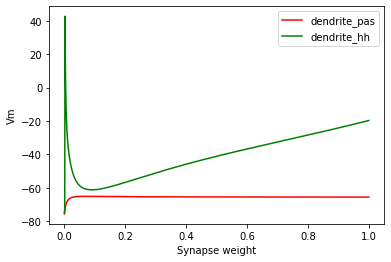

In [98]:
plt.ylabel('Vm')
plt.xlabel('Synapse weight')
plt.plot(weight,vector,'r',label='dendrite_pas')
plt.plot(weight,vector2,'g',label='dendrite_hh')
plt.savefig('weight2')
plt.legend()
plt.show()

### Le Vm maximum à bouger dans le temps

In [106]:
vectoram = []
weight = np.linspace(0,0.2,100)

for w in weight :
    asyn = h.Exp2Syn(dendrite(0.5))
    asyn.tau1 = 1.68799
    asyn.tau2 = 20.8413
    asyn.e = 0
    asyn.i = 0
    s.interval =50
    s.number= 5
    s.noise=0
    s.start=0
    stim = h.NetCon(s,asyn)
    stim.delay=100
    h.finitialize(-60 * mV)
    stim.weight[0] = w
    v_vec = h.Vector()             # Membrane potential vector
    t_vec = h.Vector()             # Time stamp vector
    vector1 = v_vec.record(soma(0.5)._ref_v)
    t_vec.record(h._ref_t)
    h.tstop = 500
    h.run()
    vectoram.append((max(vector1-min(vector1))))


In [107]:
vectoram2 = []

for w in weight :
    asyn1 = h.Exp2Syn(dendrite1(0.5))
    asyn1.tau1 = 4.06394
    asyn1.tau2 = 11
    asyn1.e = 0
    asyn1.i = 0
    s1.interval =50
    s1.number= 5
    s1.noise=0
    s1.start=0
    stim1 = h.NetCon(s1,asyn1)
    stim1.delay=100
    h.finitialize(-60 * mV)
    stim1.weight[0] = w
    v_vec1 = h.Vector()             # Membrane potential vector
    t_vec1 = h.Vector()             # Time stamp vector
    vector2= v_vec1.record(soma1(0.5)._ref_v)
    t_vec1.record(h._ref_t)
    h.tstop = 500
    h.run()
    vectoram2.append((max(vector2-min(vector2))))


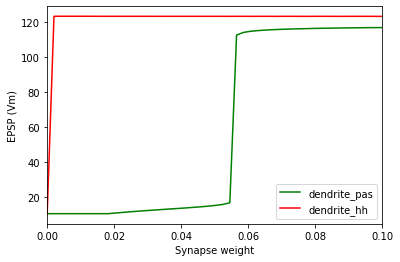

In [109]:
plt.ylabel('EPSP (Vm)')
plt.xlabel('Synapse weight')
plt.plot(weight,vectoram,'g',label='dendrite_pas')
plt.plot(weight,vectoram2,'r',label='dendrite_hh')
plt.savefig('amplitudeweight')
plt.xlim(0,0.1)
plt.legend()
plt.show()

In [69]:
print(t_vec[10000])

249.99999999990956


# On change la les paramètres de conductances pour les deux modèles

In [114]:
print(dir(soma1(0.5).hh))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'el', 'gk', 'gkbar', 'gl', 'gna', 'gnabar', 'h', 'il', 'is_ion', 'm', 'n', 'name', 'segment']


In [137]:
soma(0.5).hh.gkbar=0 
soma(0.5).hh.gnabar=0.12


(20001, 2)


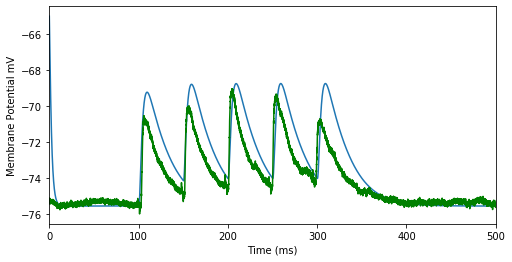

[-75.4296875  -75.35339355 -75.36865234 ... -75.50598145 -75.54412842
 -75.62805176]
[0.00000e+00 2.50000e-02 5.00000e-02 ... 4.99950e+02 4.99975e+02
 5.00000e+02]


In [138]:
print(image.shape)
x = image[:,0]*1000
y = image[:,1]
y = y-10

asyn = h.Exp2Syn(dendrite(0.5))

asyn.tau1 = 1.68799
asyn.tau2 = 20.8413 
asyn.e = 0
asyn.i = 0
s.interval =50
s.number= 5
s.noise=0
s.start=0


stim = h.NetCon(s,asyn)
stim.delay=100

stim.weight[0] = 0.00434124  # 0.0035

#x = x*1000

h.finitialize(-70 * mV)

v_vec = h.Vector()             # Membrane potential vector
t_vec = h.Vector()        
k_vec = h.Vector() 
na_vec = h.Vector()
v_vec.record(soma(0.5)._ref_v)
#k_vec.record(soma(0.5)._ref_h_hh)
#na_vec.record(soma(0.5._ref_n_hh))

t_vec.record(h._ref_t)

h.tstop = 500
h.run()
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec, v_vec)

plt.xlabel('Time (ms)')
plt.xlim(0,500)
plt.ylabel('Membrane Potential mV')
plt.plot(x,y,color='g')
plt.savefig('fit_praxis')
plt.show()
print(y)
print(x)


In [121]:
def efun(vaa):
    asyn.tau1 = vaa[0]
    asyn.tau2 = vaa[1]
    stim.weight[0] = vaa[2]
    v_vec = h.Vector()             
    t_vec = h.Vector()             
    v_vec.record(soma(0.5)._ref_v)
    t_vec.record(h._ref_t)
    #vaa=h.Vector([asyn.tau1,asyn.tau2,stim.weight[0]])
    h.tstop = 500
    h.run()
    eps = np.sum((v_vec-y)**2)
    return eps #vaa[0]+vaa[1]+vaa[2]-5 ) ** 2 +5*( vaa[0]-vaa[1]-vaa[2]-15) ** 2 
h.attr_praxis(1e-5, 0.5, 0)
print('done')
e = h.fit_praxis(efun, vaa)
print("e=%g x=%g y=%g z=%g \n"%(e,vaa[0],vaa[1],vaa[2]))
    


done


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':


e=9720.11 x=-1.64293 y=19.42 z=0.0035326 



(20001, 2)


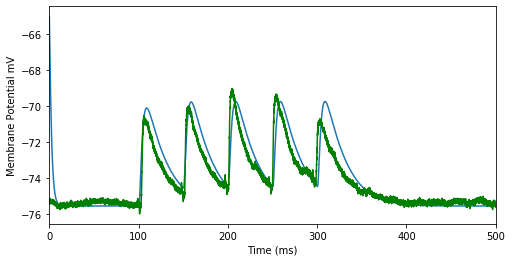

[-75.4296875  -75.35339355 -75.36865234 ... -75.50598145 -75.54412842
 -75.62805176]
[0.00000e+00 2.50000e-02 5.00000e-02 ... 4.99950e+02 4.99975e+02
 5.00000e+02]


In [122]:
print(image.shape)
x = image[:,0]*1000
y = image[:,1]
y = y-10

asyn = h.Exp2Syn(dendrite(0.5))

asyn.tau1 = 1.64293
asyn.tau2 = 19.42 
asyn.e = 0
asyn.i = 0
s.interval =50
s.number= 5
s.noise=0
s.start=0


stim = h.NetCon(s,asyn)
stim.delay=100

stim.weight[0] = 0.0035326  # 0.0035

#x = x*1000

h.finitialize(-70 * mV)

v_vec = h.Vector()             # Membrane potential vector
t_vec = h.Vector()        
k_vec = h.Vector() 
na_vec = h.Vector()
v_vec.record(soma(0.5)._ref_v)
#k_vec.record(soma(0.5)._ref_h_hh)
#na_vec.record(soma(0.5._ref_n_hh))

t_vec.record(h._ref_t)

h.tstop = 500
h.run()
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec, v_vec)

plt.xlabel('Time (ms)')
plt.xlim(0,500)
plt.ylabel('Membrane Potential mV')
plt.plot(x,y,color='g')
plt.savefig('fit_praxis')
plt.show()
print(y)
print(x)


In [139]:
soma1(0.5).hh.gkbar=0 
soma1(0.5).hh.gnabar=0.12


['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'el', 'gk', 'gkbar', 'gl', 'gna', 'gnabar', 'h', 'il', 'is_ion', 'm', 'n', 'name', 'segment']


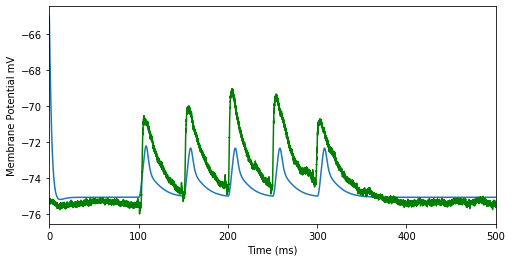

[-75.4296875  -75.35339355 -75.36865234 ... -75.50598145 -75.54412842
 -75.62805176]
[0.00000e+00 2.50000e-02 5.00000e-02 ... 4.99950e+02 4.99975e+02
 5.00000e+02]


In [140]:
h.load_file('stdrun.hoc')
print(dir(soma1(0.5).hh))
s1 = h.NetStim()
soma1(0.5).hh.el=-82.5 #pour la dendrite = voir en divisant par 10
asyn1 = h.Exp2Syn(dendrite1(0.5))

asyn1.tau1 = 4.06394
asyn1.tau2 = 11
asyn1.e = 0
asyn1.i = 0
s1.interval =50
s1.number= 5
s1.noise=0
s1.start=0


stim1 = h.NetCon(s1,asyn1)
stim1.delay=100

stim1.weight[0] = 0.0007

#x = x*1000

h.finitialize(-70 * mV)

v_vec1 = h.Vector()             # Membrane potential vector
t_vec1 = h.Vector()        
k_vec1 = h.Vector() 
na_vec1 = h.Vector()
v_vec1.record(soma1(0.5)._ref_v)
#k_vec.record(soma(0.5)._ref_h_hh)
#na_vec.record(soma(0.5._ref_n_hh))

t_vec1.record(h._ref_t)

h.tstop = 500
h.run()
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec1, v_vec1)

plt.xlabel('Time (ms)')
plt.xlim(0,500)
plt.ylabel('Membrane Potential mV')
plt.plot(x0,x1,color='g')
plt.savefig('fit_praxis')
plt.show()
print(y)
print(x)


In [125]:

vaa1=h.Vector([5,10,0.0007])

def efun1(vaa1):
    asyn1.tau1 = vaa1[0]
    asyn1.tau2 = vaa1[1]
    stim1.weight[0] = vaa1[2]
    v_vec1 = h.Vector()             
    t_vec1 = h.Vector()             
    v_vec1.record(soma1(0.5)._ref_v)
    t_vec1.record(h._ref_t)
    #vaa=h.Vector([asyn.tau1,asyn.tau2,stim.weight[0]])
    h.tstop = 500
    h.run()
    eps = np.sum((v_vec1-y)**2)
    return eps #vaa[0]+vaa[1]+vaa[2]-5 ) ** 2 +5*( vaa[0]-vaa[1]-vaa[2]-15) ** 2 
h.attr_praxis(1e-5, 0.5, 0)
print('done')
e = h.fit_praxis(efun1, vaa1)
print("e=%g x=%g y=%g z=%g \n"%(e,vaa1[0],vaa1[1],vaa1[2]))
    


done


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  


e=36845.6 x=6.5 y=11 z=0.0007 



['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'el', 'gk', 'gkbar', 'gl', 'gna', 'gnabar', 'h', 'il', 'is_ion', 'm', 'n', 'name', 'segment']


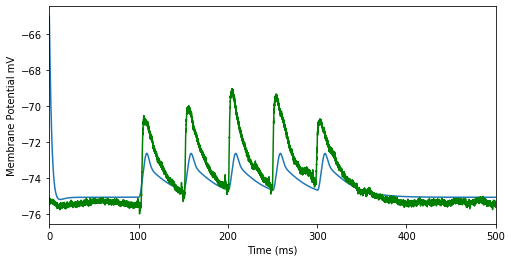

[-75.4296875  -75.35339355 -75.36865234 ... -75.50598145 -75.54412842
 -75.62805176]
[0.00000e+00 2.50000e-02 5.00000e-02 ... 4.99950e+02 4.99975e+02
 5.00000e+02]


In [150]:
h.load_file('stdrun.hoc')
print(dir(soma1(0.5).hh))
s1 = h.NetStim()
soma1(0.5).hh.el=-82.5 #pour la dendrite = voir en divisant par 10
asyn1 = h.Exp2Syn(dendrite1(0.5))

asyn1.tau1 = 5
asyn1.tau2 = 20
asyn1.e = 0
asyn1.i = 0
s1.interval =50
s1.number= 5
s1.noise=0
s1.start=0


stim1 = h.NetCon(s1,asyn1)
stim1.delay=100

stim1.weight[0] = 0.0007

#x = x*1000

h.finitialize(-70 * mV)

v_vec1 = h.Vector()             # Membrane potential vector
t_vec1 = h.Vector()        
k_vec1 = h.Vector() 
na_vec1 = h.Vector()
v_vec1.record(soma1(0.5)._ref_v)
k_vec1.record(soma1(0.5)._ref_h_hh)
na_vec1.record(soma1(0.5)._ref_n_hh)

t_vec1.record(h._ref_t)

h.tstop = 500
h.run()
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec1, v_vec1)

plt.xlabel('Time (ms)')
plt.xlim(0,500)
plt.ylabel('Membrane Potential mV')
plt.plot(x0,x1,color='g')
plt.savefig('fit_praxis')
plt.show()
print(y)
print(x)


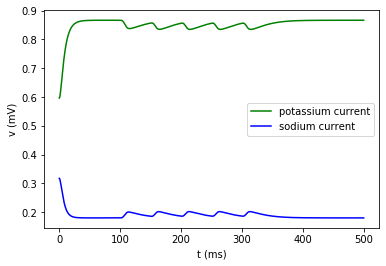

In [152]:
plt.figure()
#plt.plot(t, v, color='r',label='membrane potential')
plt.plot(t_vec, k_vec1, color='g', label ='potassium current')
plt.plot(t_vec, na_vec1, color='b', label = 'sodium current')
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')
plt.legend()
plt.show()

# Vm according ton conductance of Gna bar

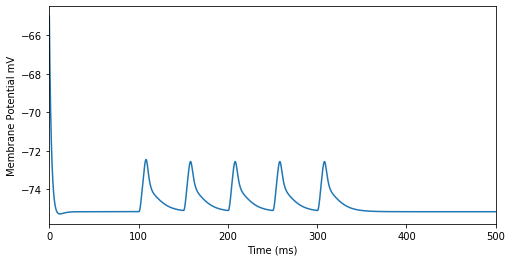

[-75.4296875  -75.35339355 -75.36865234 ... -75.50598145 -75.54412842
 -75.62805176]
[0.00000e+00 2.50000e-02 5.00000e-02 ... 4.99950e+02 4.99975e+02
 5.00000e+02]


In [162]:
soma1(0.5).hh.gkbar=0 
soma1(0.5).hh.gnabar=0

s1 = h.NetStim()
soma1(0.5).hh.el=-82.5 #pour la dendrite = voir en divisant par 10
asyn1 = h.Exp2Syn(dendrite1(0.5))

asyn1.tau1 = 4.06394
asyn1.tau2 = 11
asyn1.e = 0
asyn1.i = 0
s1.interval =50
s1.number= 5
s1.noise=0
s1.start=0


stim1 = h.NetCon(s1,asyn1)
stim1.delay=100

stim1.weight[0] = 0.0007

#x = x*1000

h.finitialize(-70 * mV)

v0 = h.Vector()             # Membrane potential vector
t_vec1 = h.Vector()        
#k_vec1 = h.Vector() 
#na_vec1 = h.Vector()
v0.record(soma1(0.5)._ref_v)
#k_vec.record(soma(0.5)._ref_h_hh)
#na_vec.record(soma(0.5._ref_n_hh))

t_vec1.record(h._ref_t)

h.tstop = 500
h.run()
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec1, v0)

plt.xlabel('Time (ms)')
plt.xlim(0,500)
plt.ylabel('Membrane Potential mV')

plt.show()
print(y)
print(x)


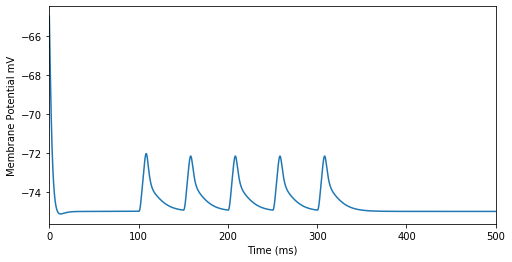

[-75.4296875  -75.35339355 -75.36865234 ... -75.50598145 -75.54412842
 -75.62805176]
[0.00000e+00 2.50000e-02 5.00000e-02 ... 4.99950e+02 4.99975e+02
 5.00000e+02]


In [164]:
soma1(0.5).hh.gkbar=0 
soma1(0.5).hh.gnabar=0.2

s1 = h.NetStim()
soma1(0.5).hh.el=-82.5 #pour la dendrite = voir en divisant par 10
asyn1 = h.Exp2Syn(dendrite1(0.5))

asyn1.tau1 = 4.06394
asyn1.tau2 = 11
asyn1.e = 0
asyn1.i = 0
s1.interval =50
s1.number= 5
s1.noise=0
s1.start=0


stim1 = h.NetCon(s1,asyn1)
stim1.delay=100

stim1.weight[0] = 0.0007

#x = x*1000

h.finitialize(-70 * mV)

v02 = h.Vector()             # Membrane potential vector
t_vec1 = h.Vector()        
#k_vec1 = h.Vector() 
#na_vec1 = h.Vector()
v02.record(soma1(0.5)._ref_v)
#k_vec.record(soma(0.5)._ref_h_hh)
#na_vec.record(soma(0.5._ref_n_hh))

t_vec1.record(h._ref_t)

h.tstop = 500
h.run()
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec1, v02)

plt.xlabel('Time (ms)')
plt.xlim(0,500)
plt.ylabel('Membrane Potential mV')

plt.show()
print(y)
print(x)


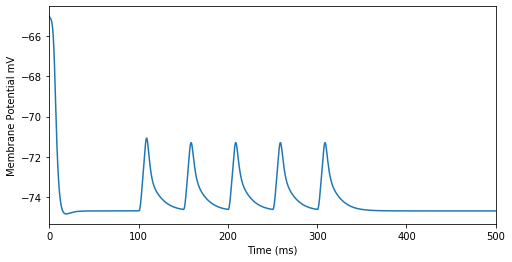

[-75.4296875  -75.35339355 -75.36865234 ... -75.50598145 -75.54412842
 -75.62805176]
[0.00000e+00 2.50000e-02 5.00000e-02 ... 4.99950e+02 4.99975e+02
 5.00000e+02]


In [165]:
soma1(0.5).hh.gkbar=0 
soma1(0.5).hh.gnabar=0.5

s1 = h.NetStim()
soma1(0.5).hh.el=-82.5 #pour la dendrite = voir en divisant par 10
asyn1 = h.Exp2Syn(dendrite1(0.5))

asyn1.tau1 = 4.06394
asyn1.tau2 = 11
asyn1.e = 0
asyn1.i = 0
s1.interval =50
s1.number= 5
s1.noise=0
s1.start=0


stim1 = h.NetCon(s1,asyn1)
stim1.delay=100

stim1.weight[0] = 0.0007

#x = x*1000

h.finitialize(-70 * mV)

v05 = h.Vector()             # Membrane potential vector
t_vec1 = h.Vector()        
#k_vec1 = h.Vector() 
#na_vec1 = h.Vector()
v05.record(soma1(0.5)._ref_v)
#k_vec.record(soma(0.5)._ref_h_hh)
#na_vec.record(soma(0.5._ref_n_hh))

t_vec1.record(h._ref_t)

h.tstop = 500
h.run()
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec1, v05)

plt.xlabel('Time (ms)')
plt.xlim(0,500)
plt.ylabel('Membrane Potential mV')

plt.show()
print(y)
print(x)


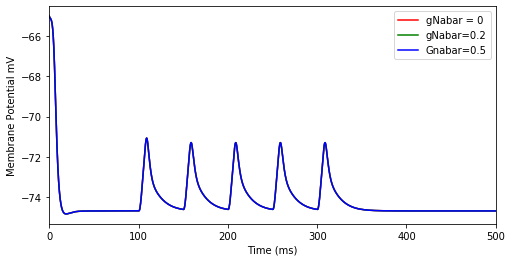

[-75.4296875  -75.35339355 -75.36865234 ... -75.50598145 -75.54412842
 -75.62805176]
[0.00000e+00 2.50000e-02 5.00000e-02 ... 4.99950e+02 4.99975e+02
 5.00000e+02]


In [167]:
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec1, v0,'r',label='gNabar = 0')
plt.plot(t_vec1, v02,'g',label='gNabar=0.2')
plt.plot(t_vec1, v05,'b',label='Gnabar=0.5')

plt.xlabel('Time (ms)')
plt.xlim(0,500)
plt.ylabel('Membrane Potential mV')
plt.legend()
plt.show()
print(y)
print(x)